In [1]:
%load_ext autoreload
%autoreload 2
import warnings; warnings.filterwarnings("ignore")

In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


import modelprop

### Auxiliary functions

In [375]:
import numpy as np
from scipy.stats import lognorm

def plot_fragility(model,limit_states,imrange=[],figfilename=''):
    ''' plot fragility curves for all damage states for the same taxonomy'''

    if len(imrange):
        iml = imrange
    else:
        iml = np.arange(float(model.im_min),float(model.im_max),0.01)        
        
    for ls in limit_states:
        mean = model[ls+'_mean']
        stddev = model[ls+'_stddev']
        #print(len(iml),mean,stddev)
        fc=lognorm.cdf(np.log(iml/mean)/float(stddev), s=stddev)
        #fc2=lognorm.cdf(iml,s=stddev,scale=mean)
        plt.plot(iml,fc,label=ls)

    plt.xlabel('{0} ({1})'.format(model.imt,model.imu))
    plt.ylabel('Exceedance Probability')
    plt.title('{} ({})'.format(model.name,model.id))    
    plt.legend()
    plt.grid(True)
    if (figfilename):
        #print ('saving fig {}'.format(figfilename))
        plt.savefig(figfilename,dpi=300)    
    plt.show()

#test
#plot_fragility(frag,ls)

def get_curve(model, tax):
    return(model.data.set_index('taxonomy').loc[tax])

def get_limit_states(metadata):
    return (metadata['limit_states'])

### Test ModelProp 

In [269]:
#create an argument list
from argparse import Namespace
args = Namespace(schema='SARA_v1.0',assetcategory='buildings',
 losscategory='structural',taxonomies='["MUR-H1"]')

#instantiate the class and run the main function
model = modelprop.Main(args)
model.run()

0

### Retrieve limit states and curve parameters, plot it

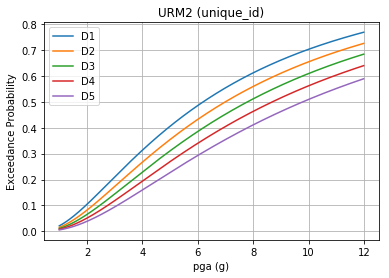

In [374]:

ls = get_limit_states(model.metadata)

frag = get_curve(model,'MUR-H1')

plot_fragility(frag,ls)